## Análisis exploratorio

Se importa pandas para explorar y transformar los dataframes.

In [2]:
import pandas as pd

Se ingestan los archivos de train y test

In [3]:
df_train = pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')

Se suma la cantidad de nulos en cada columna

In [5]:
df_train.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

Se leyeron algunas de las descripciones de los inmuebles, en donde se observó que proporcionaban más información que las demás columnas del dataset. Con base en esto se decidió seguir un enfoque orientado al **Procesamiento de Lenguaje Natural (NLP)**.

In [6]:
import numpy as np
index_random = np.random.randint(0,high = df_train.shape[0])
descripcion = df_train.iloc[index_random].description
print(index_random, descripcion)

252893 Tucked into a peaceful residential area with rolling hills and mature trees, Peaks at Gainesville offers a luxurious retreat just minutes from downtown Gainesville, Georgia and the North Georgia Mountains. Enjoy a gorgeous park-like setting while still being just a short distance from the University of North Georgia and Brenau University, Mall of Georgia and North East Georgia Medical Center. Peaks at Gainesville provides a beautifully-landscaped property with scenic views.  We also offer a resort-style swimming pool, a terrific clubhouse and a state-of-the-art fitness center. Peaks at Gainesville interiors feature two-tone designer paint, balconies, defined dining areas, gourmet kitchens, crown molding, and nine-foot ceilings. Experience luxury living in the heart of Gainesville at Peaks at Gainesville!  -Open-Concept -Sundeck and Lounge Area -Air Conditioning -Close to Restaurants -Dishwasher -Close to Freeway -Window Coverings -Swimming Pool -Close to Schools -Pet Friendly -W

## Limpieza y transformación de los datos

In [7]:
# Dataframe unicamente con las filas donde hay valores nulos en la columna description
nan_rows = df_train[df_train['description'].isnull()]
nan_rows

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
198741,7038994780,https://savannah.craigslist.org/apa/d/pooler-p...,savannah / hinesville,https://savannah.craigslist.org,905,apartment,1132,2,2.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00m0m_9wTPUMJWyt...,None,32.1149,-81.2520,ga
210823,7040721424,https://hudsonvalley.craigslist.org/apa/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,1600,apartment,950,2,1.0,1,...,0,0,0,None,None,https://images.craigslist.org/00j0j_cdesyqAgYg...,None,41.7035,-73.9117,ny


In [10]:
# Se corre el shape antes y después de eliminar los 2 registros con valor nulo en la columna description, para verificar la eliminación.
df_train.shape

(346477, 22)

In [9]:
# Eliminación de los registros nulos de la columna description.
df_train = df_train.drop(nan_rows.index.values)

Se decidió utilizar todas las columnas que proporcionaran información de tipo texto, las seleccionadas fueron: *'region', 'type', 'laundry_options', 'parking_options' y'description'*

In [11]:
# Para las columnas 'laundry_options' y 'parking_options'fue necesario rellenar los valores vacíos con un espacio para que no provocaran errores después.

df_train['parking_options'] = df_train['parking_options'].fillna(' ')
df_train['laundry_options'] = df_train['laundry_options'].fillna(' ')

In [12]:
df_test['parking_options'] = df_test['parking_options'].fillna(' ')
df_test['laundry_options'] = df_test['laundry_options'].fillna(' ')

Se genera un nuevo dataset unicamente con las columnas deseadas.

In [13]:
df_train_texto = df_train[['region','type','laundry_options','parking_options','description']].copy()
df_train_texto.head()

,region,type,laundry_options,parking_options,description
0,boise,house,w/d in unit,detached garage,Super cute row house in the Boise bench area. ...
1,colorado springs,apartment,w/d in unit,carport,Windtree Apartment Homes currently has a spaci...
2,norfolk / hampton roads,apartment,w/d hookups,off-street parking,Call Today! show contact info Indian Lakes ...
3,phoenix,house,w/d in unit,,Cody Anderson Two Brothers Realty License #: S...
4,nashville,apartment,w/d in unit,carport,To schedule a tour We now book our tour appoin...


In [14]:
df_test_texto = df_test[['region','type','laundry_options','parking_options','description']].copy()
df_test_texto.head()

,region,type,laundry_options,parking_options,description
0,ann arbor,manufactured,w/d in unit,off-street parking,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI..."
1,vermont,apartment,w/d hookups,off-street parking,"Think of it, you'll be first to get your mail...."
2,ann arbor,apartment,w/d in unit,carport,One of Ann Arbor's most luxurious apartment co...
3,fort collins / north CO,apartment,w/d in unit,attached garage,"Specials! Move in before January 16th, 2020 an..."
4,charlottesville,apartment,laundry on site,,Barracks West Apartments & Townhomes in Charlo...


Se concatenan todas las columnas en una nueva columna.

In [15]:
df_train_texto['texto'] = df_train['region'] + " " + df_train['type'] + " " + df_train['laundry_options'] + " " + df_train['parking_options'] + " " + df_train['description']
df_train_texto.head()

,region,type,laundry_options,parking_options,description,texto
0,boise,house,w/d in unit,detached garage,Super cute row house in the Boise bench area. ...,boise house w/d in unit detached garage Super ...
1,colorado springs,apartment,w/d in unit,carport,Windtree Apartment Homes currently has a spaci...,colorado springs apartment w/d in unit carport...
2,norfolk / hampton roads,apartment,w/d hookups,off-street parking,Call Today! show contact info Indian Lakes ...,norfolk / hampton roads apartment w/d hookups ...
3,phoenix,house,w/d in unit,,Cody Anderson Two Brothers Realty License #: S...,phoenix house w/d in unit Cody Anderson Two ...
4,nashville,apartment,w/d in unit,carport,To schedule a tour We now book our tour appoin...,nashville apartment w/d in unit carport To sch...


In [16]:
df_test_texto['texto'] = df_test['region'] + " " + df_test['type'] + " " + df_test['laundry_options'] + " " + df_test['parking_options'] + " " + df_test['description']
df_test_texto.head()

,region,type,laundry_options,parking_options,description,texto
0,ann arbor,manufactured,w/d in unit,off-street parking,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",ann arbor manufactured w/d in unit off-street ...
1,vermont,apartment,w/d hookups,off-street parking,"Think of it, you'll be first to get your mail....",vermont apartment w/d hookups off-street parki...
2,ann arbor,apartment,w/d in unit,carport,One of Ann Arbor's most luxurious apartment co...,ann arbor apartment w/d in unit carport One of...
3,fort collins / north CO,apartment,w/d in unit,attached garage,"Specials! Move in before January 16th, 2020 an...",fort collins / north CO apartment w/d in unit ...
4,charlottesville,apartment,laundry on site,,Barracks West Apartments & Townhomes in Charlo...,charlottesville apartment laundry on site Ba...


Se agrega la columna 'price' para realizar la categorización requerida para la evaluación del modelo.

In [17]:
df_train_texto['precio'] = df_train['price']

Ya que todo el texto se encuentra en una sola columna se eliminan las columnas originales, dejando únicamente la columna 'texto'.

In [18]:
df_train_texto.drop(columns=['region','type','laundry_options','parking_options','description'], inplace=True)
df_train_texto.head()

,texto,precio
0,boise house w/d in unit detached garage Super ...,1350
1,colorado springs apartment w/d in unit carport...,1115
2,norfolk / hampton roads apartment w/d hookups ...,1129
3,phoenix house w/d in unit Cody Anderson Two ...,1580
4,nashville apartment w/d in unit carport To sch...,995


In [19]:
df_test_texto.drop(columns=['region','type','laundry_options','parking_options','description'], inplace=True)
df_test_texto.head()

,texto
0,ann arbor manufactured w/d in unit off-street ...
1,vermont apartment w/d hookups off-street parki...
2,ann arbor apartment w/d in unit carport One of...
3,fort collins / north CO apartment w/d in unit ...
4,charlottesville apartment laundry on site Ba...


Se generan las categorías solicitadas.

In [20]:
df_train_texto.loc[(df_train_texto['precio'] >= 0) & (df_train_texto['precio'] <= 999), 'category_price'] = 'low'
df_train_texto.loc[(df_train_texto['precio'] >= 1000 ) & (df_train_texto['precio'] <= 1999), 'category_price'] = 'medium'
df_train_texto.loc[(df_train_texto['precio'] >= 2000), 'category_price'] = 'high'
df_train_texto.head()

,texto,precio,category_price
0,boise house w/d in unit detached garage Super ...,1350,medium
1,colorado springs apartment w/d in unit carport...,1115,medium
2,norfolk / hampton roads apartment w/d hookups ...,1129,medium
3,phoenix house w/d in unit Cody Anderson Two ...,1580,medium
4,nashville apartment w/d in unit carport To sch...,995,low


In [21]:
df_train_texto.loc[(df_train_texto['precio'] >= 0) & (df_train_texto['precio'] <= 999), 'target'] = '1'
df_train_texto.loc[(df_train_texto['precio'] > 999), 'target'] = '0'
df_train_texto.head()

,texto,precio,category_price,target
0,boise house w/d in unit detached garage Super ...,1350,medium,0
1,colorado springs apartment w/d in unit carport...,1115,medium,0
2,norfolk / hampton roads apartment w/d hookups ...,1129,medium,0
3,phoenix house w/d in unit Cody Anderson Two ...,1580,medium,0
4,nashville apartment w/d in unit carport To sch...,995,low,1


## Preprocesamiento del texto

In [22]:
# Se importan las librerías necesarias.
import re
import nltk
from nltk.stem import PorterStemmer

In [23]:
# Se guarda en una variable todas las stopwords de inglés
stopwords = nltk.corpus.stopwords.words('english')

In [24]:
# Se instancia el algoritmo para derivación de palabras
stemmer = PorterStemmer()

Se generó una función para la normalización y derivación (stemming) del texto. Se eligió el enfoque de derivación sobre el de lematización ya que en este no es necesario indicar la función que tienen las palabras en texto, además de que funciona bien para textos en inglés ya que las palabras generalmente comparten la misma raíz.

In [26]:
def procesamiento_texto(df_texto):

    '''
    Esta función recibe como parámetro un dataframe donde haya una columna llamada 'texto'.
    Devuelve como resultado una lista con todos los registros después de haberseles aplicado Normalizacion y luega Stemming a cada uno.
    '''

    descripcion_stem=[]
    for texto in df_texto['texto']:
    # Se eliminan las URLs que pueda haber en el texto
        texto = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", texto)
    # Se reemplazan los caracteres que no sean letras por espacios
        texto=re.sub("[^a-zA-Z]"," ",str(texto))
    # Se pasa todo a minúsculas
        texto=texto.lower()
    # Se tokeniza para separar las palabras
        texto=nltk.word_tokenize(texto)

    # Se eliminan las palabras de menos de 3 letras
        texto = [palabra for palabra in texto if len(palabra)>3]
    # Se eliminan las Stopwords
        texto = [palabra for palabra in texto if not palabra in stopwords]
    
    ## Hasta acá se normalizó, ahora a stemmizar
    
    # Se aplica la funcion para buscar la raiz de las palabras
        texto = [stemmer.stem(palabra) for palabra in texto]
    # Por ultimo volvemos a unir el titular
        texto=" ".join(texto)

        descripcion_stem.append(texto)

    return descripcion_stem

Se normaliza el texto de los datasets.

In [27]:
descripcion_stem_train = procesamiento_texto(df_train_texto)

In [38]:
descripcion_stem_test = procesamiento_texto(df_test_texto)

Se agrega una nueva columna con el texto normalizado.

In [28]:
df_train_texto.insert(1, 'descripcion_stem', descripcion_stem_train)
df_train_texto.head()

,texto,descripcion_stem,precio,category_price,target
0,boise house w/d in unit detached garage Super ...,bois hous unit detach garag super cute hous bo...,1350,medium,0
1,colorado springs apartment w/d in unit carport...,colorado spring apart unit carport windtre apa...,1115,medium,0
2,norfolk / hampton roads apartment w/d hookups ...,norfolk hampton road apart hookup street park ...,1129,medium,0
3,phoenix house w/d in unit Cody Anderson Two ...,phoenix hous unit codi anderson brother realti...,1580,medium,0
4,nashville apartment w/d in unit carport To sch...,nashvil apart unit carport schedul tour book t...,995,low,1


In [39]:
df_test_texto.insert(1, 'descripcion_stem', descripcion_stem_test)
df_test_texto['descripcion_stem'] = descripcion_stem_test
df_test_texto.head()

,texto,descripcion_stem
0,ann arbor manufactured w/d in unit off-street ...,arbor manufactur unit street park open hous to...
1,vermont apartment w/d hookups off-street parki...,vermont apart hookup street park think first m...
2,ann arbor apartment w/d in unit carport One of...,arbor apart unit carport arbor luxuri apart co...
3,fort collins / north CO apartment w/d in unit ...,fort collin north apart unit attach garag spec...
4,charlottesville apartment laundry on site Ba...,charlottesvil apart laundri site barrack west ...


## Modelado

In [29]:
# Se importan librerías necesarias

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Se definen las variables para entrenamiento y testeo

x_train = list(df_train_texto['descripcion_stem'].values)
y_train = df_train_texto['target'].values
x_test = list(df_test_texto['descripcion_stem'].values)

Previo al modelado se obtuvo la estadistica descriptiva del texto, esto para seleccionar el hiperparámetro **max_features** al vectorizar. Se seleccionó 936 ya que con este valor se abarca el 75% de los textos completos. Con esto se crea un vocabulario con las palabras principales, ordenadas por frecuencia.

In [41]:
df_train_texto['descripcion_stem'].apply(len).describe()

count    346477.000000
mean        732.975825
std         469.540962
min          16.000000
25%         431.000000
50%         657.000000
75%         936.000000
max       11794.000000
Name: descripcion_stem, dtype: float64

In [42]:
# Se crea el pipeline para la vectorización y después el modelado.

pipeline = Pipeline([('bag', CountVectorizer(max_features=936, ngram_range=(1,2))),
					 ('clf', RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state = 42))])

In [43]:
#Se entrena el modelo

pipeline.fit(x_train, y_train)

Pipeline(steps=[('bag', CountVectorizer(max_features=936, ngram_range=(1, 2))),
                ('clf',
                 RandomForestClassifier(n_estimators=20, n_jobs=-1,
                                        random_state=42))])

Se grafican las características (features) más importantes para clasificar, es decir, las palabras que en mayor medida determinan el precio de una propiedad para el clasificador Random Forest.

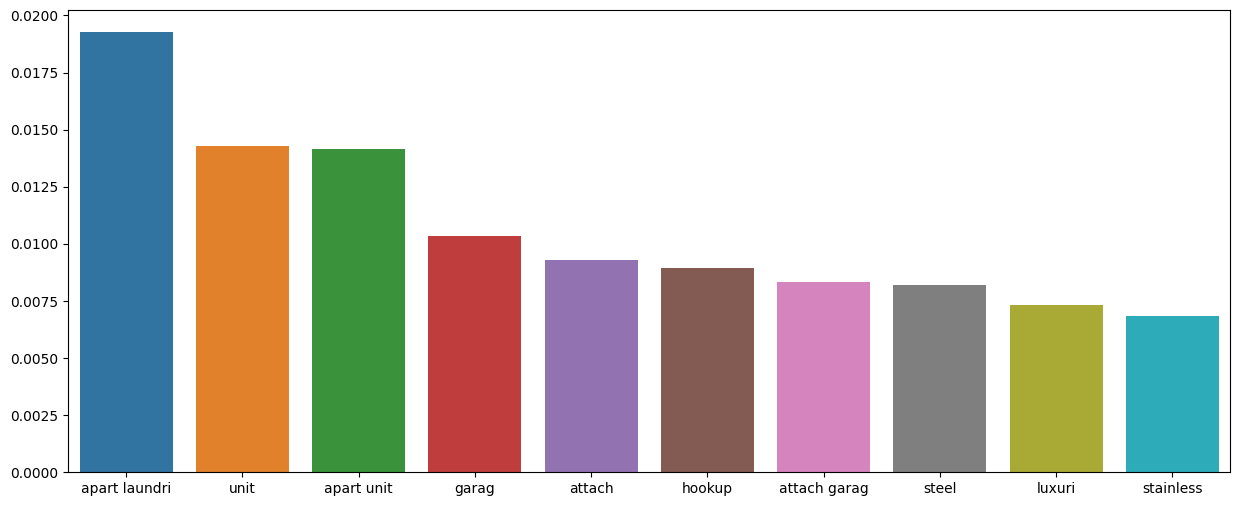

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

importances = pipeline.named_steps['clf'].feature_importances_
# Tomamos la lista de palabras
all_words = pipeline.named_steps['bag'].get_feature_names_out()
columns = all_words

# Ordenamos por importnacia y tomamos las 10 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:10]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,6))
sns.barplot(x = selected_columns, y = selected_importances)
plt.show()

In [100]:
# Se predice 

prediccion = pipeline.predict(x_test)

In [106]:
#Se genera el dataframe para enviar a evaluación.

df_predicciones = pd.DataFrame(prediccion, columns=['pred'])
df_predicciones

,pred
0,0
1,1
2,0
3,0
4,0
...,...
38493,0
38494,1
38495,0
38496,0


In [107]:
df_predicciones.to_csv('SheilaFrancisco.csv', index=False)

## Pasos previos

##### 1. Definir el hiperparámetro de número de estimadores.

In [47]:
cou_vec = CountVectorizer(max_features=936, ngram_range=(1,2))
matriz = cou_vec.fit_transform(x_train)

In [48]:
x = matriz.toarray()
y = y_train

Se hizo una división de los datos de train para probar localmente.

In [49]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y_train)

Se corrió un ciclo para probar diferente número de estimadores y después se graficó para seleccionar el óptimo.

In [50]:
import sklearn.metrics as metrics
import numpy as np

train_accuracy = []
test_accuracy = []

N_estimadores = [1, 5, 10, 20, 35, 50, 75, 100]

for estimadores in N_estimadores:

    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, random_state = 42)
    clf.fit(xtrain,ytrain)
    
    ytrain_pred = clf.predict(xtrain)
    ytest_pred = clf.predict(xtest)
    
    train_accuracy.append(metrics.accuracy_score(ytrain, ytrain_pred))
    test_accuracy.append(metrics.accuracy_score(ytest, ytest_pred))
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)

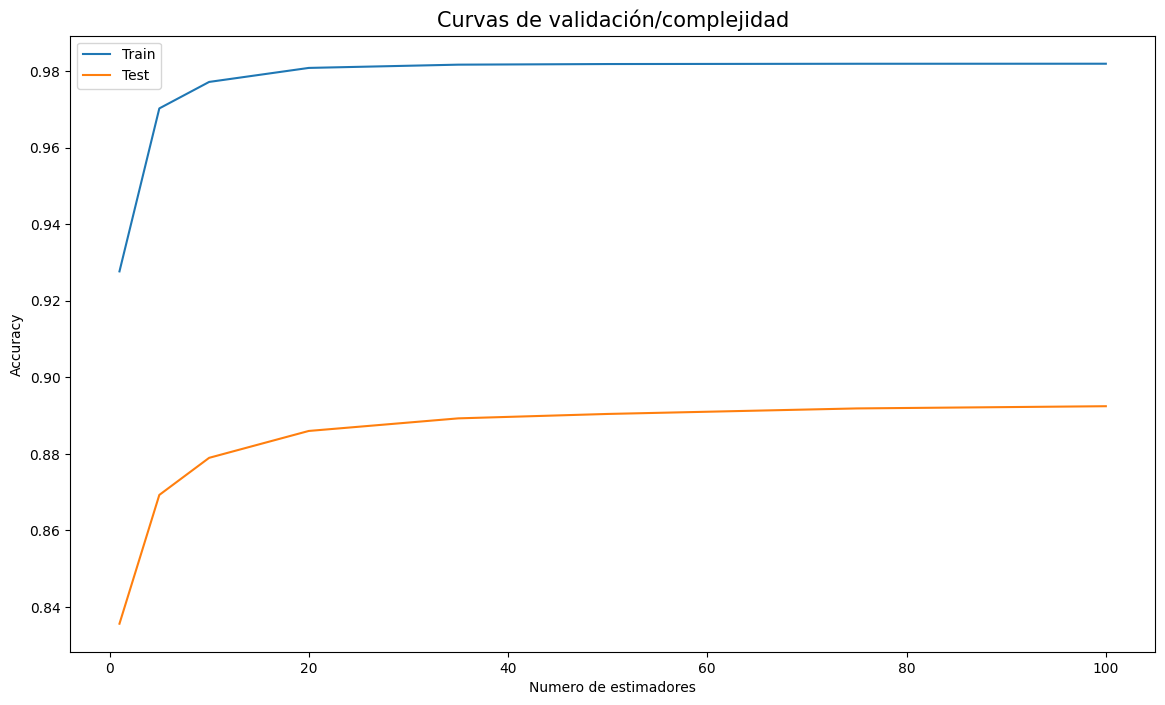

In [51]:
plt.figure(figsize = (14,8))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de validación/complejidad', fontsize = 15)
plt.show()

##### 2. Evaluación del modelo

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [54]:
rf = RandomForestClassifier(n_estimators = 20, random_state=42)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20, random_state=42)

In [55]:
y_train_pred = rf.predict(xtrain)
y_test_pred = rf.predict(xtest)

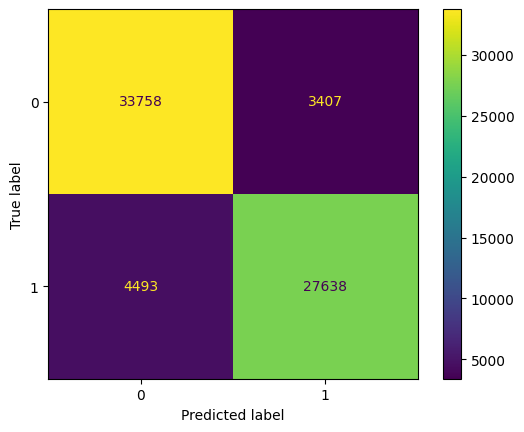

In [59]:
cm = confusion_matrix(ytest, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

In [61]:
exactitud = accuracy_score(ytest, y_test_pred)
exactitud

0.8859963057030709

In [62]:
precision = recall_score(ytest, y_test_pred, average= None)
precision

array([0.90832773, 0.86016619])